In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from pypdf import PdfReader, PdfWriter, Transformation

## Stoch Version

In [2]:
lambda1 = 1

# Parameters
interarrival_times = [0, 2.1, 1.25, 1.5, 3, 2]
arrival_times = np.cumsum(interarrival_times)
activation_times = [1.85, 2.5, 1.5, 1.5, 1.75]
colors = ['blue', 'red', 'cyan', 'purple', 'orange']

vertices_coord = [1,2,3, 8,9,10]
events = [[1,3], [8,9], [9,10], [2,9], [1,2]]

/var/folders/39/mrj9jtrn5fb2d2f71qw3dhy80000gn/T/ipykernel_4899/4001291901.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


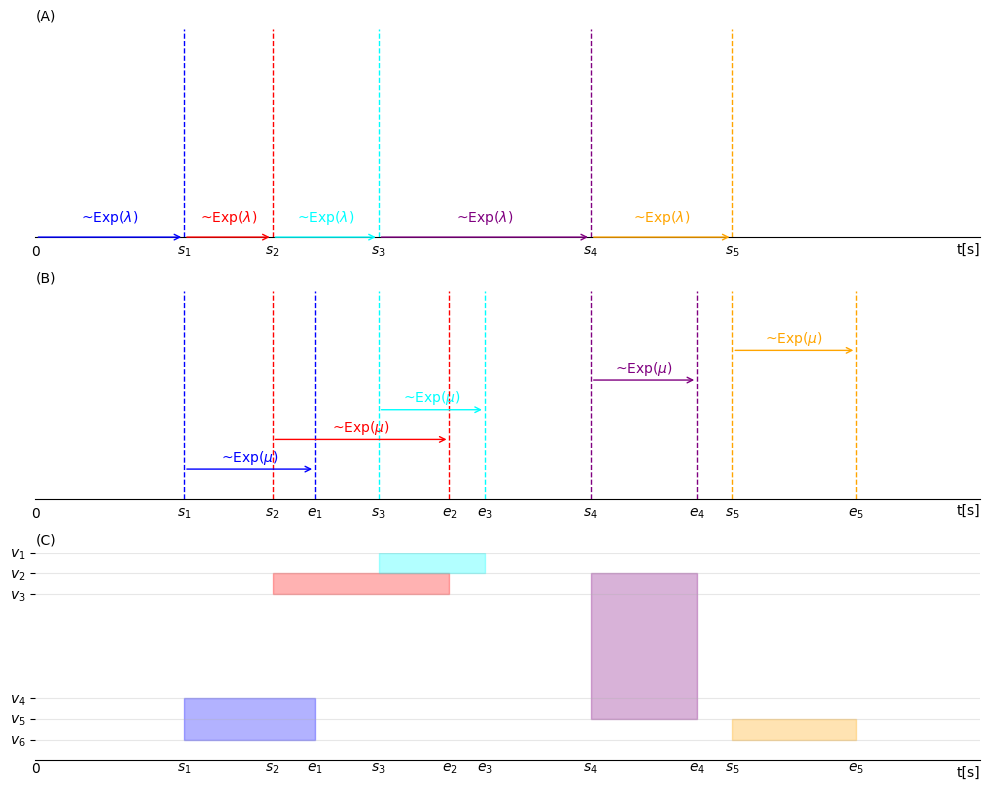

In [ ]:
# Create the 3x1 subplot
fig, axs = plt.subplots(3, 1, figsize=(10, 8))

# First plot: Starting Times
for i, t in enumerate(arrival_times[1:]):
    axs[0].axvline(t, color=colors[i], linestyle='dashed', linewidth=1)
    axs[0].text(t, -0.75, fr'$s_{i+1}$', color='black', ha='center', va='bottom', fontsize=10)
axs[0].text(0, -0.75, 0, color='black', ha='center', va='bottom', fontsize=10)

for i in range(1, len(arrival_times)):
    axs[0].annotate('', xy=(arrival_times[i], 0), xytext=(arrival_times[i - 1], 0),
                    arrowprops=dict(arrowstyle='->', color=colors[i-1], lw=1.0))
    midpoint = (arrival_times[i] + arrival_times[i - 1]) / 2
    axs[0].text(midpoint, +0.5, r'~Exp($\lambda$)', color=colors[i-1], ha='center', fontsize=10)

axs[0].set_xticks([])
axs[0].set_xlabel('t[s]', loc='right')
axs[0].set_yticks([])
axs[0].set_xlim(0, arrival_times[-1] + 2 * activation_times[-1])
axs[0].set_ylim(0, len(arrival_times)+1)
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)

# Second plot: Ending Times
for i, t in enumerate(arrival_times[1:]):
    axs[1].axvline(t, color=colors[i], linestyle='dashed', linewidth=1)
    axs[1].text(t, -0.75, fr'$s_{i+1}$', color='black', ha='center', va='bottom', fontsize=10)
    end_time = t + activation_times[i]
    axs[1].axvline(end_time, color=colors[i], linestyle='dashed', linewidth=1)
    axs[1].text(end_time, -0.75, fr'$e_{i+1}$', color='black', ha='center', va='bottom', fontsize=10)
    axs[1].annotate('', xy=(arrival_times[i+1], i+1), xytext=(arrival_times[i+1] + activation_times[i], i+1),
                    arrowprops=dict(arrowstyle='<-', color=colors[i], lw=1.0))
    midpoint = (2 * arrival_times[i+1] + activation_times[i]) / 2
    axs[1].text(midpoint, i+1.25, r'~Exp($\mu$)', color=colors[i], ha='center', fontsize=10)

axs[1].text(0, -0.75, 0, color='black', ha='center', va='bottom', fontsize=10)
axs[1].set_xticks([])
axs[1].set_xlabel('t[s]', loc='right')
axs[1].set_yticks([])
axs[1].set_xlim(0, arrival_times[-1] + 2 * activation_times[-1])
axs[1].set_ylim(0, len(arrival_times)+1)
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)


# Third plot: Resulting Dynamic Network
for i, t in enumerate(arrival_times[1:]):
    end_time = t + activation_times[i]
    axs[2].text(t, -0.75, fr'$s_{i+1}$', color='black', ha='center', va='bottom', fontsize=10)
    axs[2].text(end_time, -0.75, fr'$e_{i+1}$', color='black', ha='center', va='bottom', fontsize=10)
    axs[2].fill_betweenx(events[i], t, end_time, color=colors[i], alpha=0.3)

axs[2].text(0, -0.75, 0, color='black', ha='center', va='bottom', fontsize=10)
axs[2].set_xticks([])
axs[2].set_xlabel('t[s]', loc='right')

vertices = []
for i in range(1, 7):
    #axs[2].text(0.15, i, f'v{7-i}', color='black', ha='center', va='bottom', fontsize=10)
    vertices.append(fr'$v_{7-i}$')
axs[2].set_yticks(vertices_coord)
axs[2].set_yticklabels(vertices, minor=False, rotation=0)

axs[2].set_xlim(0, arrival_times[-1] + 2 * activation_times[-1])
axs[2].set_ylim(0, max(vertices_coord))
axs[2].spines['top'].set_visible(False)
axs[2].spines['right'].set_visible(False)
axs[2].spines['left'].set_visible(False)
axs[2].grid(axis='y', alpha=0.3)

inset_ax = inset_axes(
    axs[2],
    width="50%", height="50%",
    loc="lower left",
    bbox_to_anchor=(0.00, 0.25, 0.28, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0
)
inset_ax.set_axis_off()

list_titles = ['(A)', '(B)', '(C)']
for j, ax in enumerate(axs):
    ax.set_title(list_titles[j], loc='left', fontsize=10)

# IMPORTANT: finalize layout BEFORE saving and measuring
fig.tight_layout()
fig.canvas.draw()

# base_pdf = "/Users/samuelkoovely/Desktop/fig_EDEDE/base.pdf"
# fig.savefig(base_pdf)  # keep NO bbox_inches='tight'

In [4]:
# --- robust bbox extraction in points (PDF uses points) ---
renderer = fig.canvas.get_renderer()
bb_disp = inset_ax.get_window_extent(renderer=renderer)  # in display pixels

dpi = fig.dpi
x_pt = bb_disp.x0 * 72.0 / dpi
y_pt = bb_disp.y0 * 72.0 / dpi
w_pt = bb_disp.width  * 72.0 / dpi
h_pt = bb_disp.height * 72.0 / dpi

inset_pdf = "/Users/samuelkoovely/Desktop/fig_EDEDE/fig_connectivity.pdf"
out_pdf   = "/Users/samuelkoovely/Desktop/fig_EDEDE/combined.pdf"

# ... after fig.canvas.draw() and after you computed x_pt, y_pt, w_pt, h_pt ...

base_page  = PdfReader(base_pdf).pages[0]
inset_page = PdfReader(inset_pdf).pages[0]

# Use cropbox if present (usually what you want for "tight" PDF figures)
box = getattr(inset_page, "cropbox", None) or inset_page.mediabox

llx, lly = float(box.lower_left[0]), float(box.lower_left[1])
urx, ury = float(box.upper_right[0]), float(box.upper_right[1])
in_w, in_h = (urx - llx), (ury - lly)

k = 1.5  # make inset 25% bigger than "fit"
# Scale to fit your target inset rectangle
s = min(w_pt / in_w, h_pt / in_h)
s2 = k * s

# Center inside target rectangle (using the *new* scaled size)
dx = x_pt + (w_pt - s2 * in_w) / 2
dy = y_pt + (h_pt - s2 * in_h) / 2
#vertical adjustment
dy=1.1*dy

ctm = (
    Transformation()
    .translate(-llx, -lly)
    .scale(s2, s2)
    .translate(dx, dy)
)

base_page.merge_transformed_page(inset_page, ctm, over=True)

writer = PdfWriter()
writer.add_page(base_page)
with open(out_pdf, "wb") as f:
    writer.write(f)

print("Wrote:", out_pdf)

Wrote: /Users/samuelkoovely/Desktop/fig_EDEDE/combined.pdf
